<a href="https://colab.research.google.com/github/Satorresja/COVID-19/blob/master/Tarea2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [315]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import pylab as pl
import warnings
import datetime as dt

warnings.filterwarnings("ignore")

!pip install wget
import wget

#datos covid19 - mundo
#url = "https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv"
#datos Colombia
url = "https://www.datos.gov.co/api/views/gt2j-8ykr/rows.csv?accessType=DOWNLOAD"
wget.download(url, 'Casos_positivos_de_COVID-19_en_Colombia.csv')
df = pd.read_csv('Casos_positivos_de_COVID-19_en_Colombia.csv')
df.head(10)


,ID de caso,Fecha de notificación,Codigo DIVIPOLA,Ciudad de ubicación,Departamento o Distrito,atención,Edad,Sexo,Tipo,Estado,País de procedencia,FIS,Fecha de muerte,Fecha diagnostico,Fecha recuperado,Fecha reporte web
0,1,2020-03-02T00:00:00.000,11001,Bogotá D.C.,Bogotá D.C.,Recuperado,19,F,Importado,Leve,ITALIA,2020-02-27T00:00:00.000,NaN,2020-03-06T00:00:00.000,2020-03-13T00:00:00.000,2020-03-06T00:00:00.000
1,2,2020-03-06T00:00:00.000,76111,Guadalajara de Buga,Valle del Cauca,Recuperado,34,M,Importado,Leve,ESPAÑA,2020-03-04T00:00:00.000,NaN,2020-03-09T00:00:00.000,2020-03-19T00:00:00.000,2020-03-09T00:00:00.000
2,3,2020-03-07T00:00:00.000,5001,Medellín,Antioquia,Recuperado,50,F,Importado,Leve,ESPAÑA,2020-02-29T00:00:00.000,NaN,2020-03-09T00:00:00.000,2020-03-15T00:00:00.000,2020-03-09T00:00:00.000
3,4,2020-03-09T00:00:00.000,5001,Medellín,Antioquia,Recuperado,55,M,Relacionado,Leve,COLOMBIA,2020-03-06T00:00:00.000,NaN,2020-03-11T00:00:00.000,2020-03-26T00:00:00.000,2020-03-11T00:00:00.000
4,5,2020-03-09T00:00:00.000,5001,Medellín,Antioquia,Recuperado,25,M,Relacionado,Leve,COLOMBIA,2020-03-08T00:00:00.000,NaN,2020-03-11T00:00:00.000,2020-03-23T00:00:00.000,2020-03-11T00:00:00.000
5,6,2020-03-10T00:00:00.000,5360,Itagüí,Antioquia,Recuperado,27,F,Relacionado,Leve,COLOMBIA,2020-03-06T00:00:00.000,NaN,2020-03-11T00:00:00.000,2020-03-26T00:00:00.000,2020-03-11T00:00:00.000
6,7,2020-03-08T00:00:00.000,13001,Cartagena de Indias,Cartagena D.T. y C.,Recuperado,85,F,Importado,Leve,ESTADOS UNIDOS DE AMERICA,2020-03-02T00:00:00.000,NaN,2020-03-11T00:00:00.000,2020-03-17T00:00:00.000,2020-03-11T00:00:00.000
7,8,2020-03-09T00:00:00.000,11001,Bogotá D.C.,Bogotá D.C.,Recuperado,22,F,Importado,Leve,ESPAÑA,2020-03-06T00:00:00.000,NaN,2020-03-11T00:00:00.000,2020-03-21T00:00:00.000,2020-03-11T00:00:00.000
8,9,2020-03-08T00:00:00.000,11001,Bogotá D.C.,Bogotá D.C.,Recuperado,28,F,Importado,Leve,ESPAÑA,2020-03-08T00:00:00.000,NaN,2020-03-11T00:00:00.000,2020-03-23T00:00:00.000,2020-03-11T00:00:00.000
9,10,2020-03-12T00:00:00.000,11001,Bogotá D.C.,Bogotá D.C.,Recuperado,36,F,Importado,Leve,ESPAÑA,2020-03-06T00:00:00.000,NaN,2020-03-12T00:00:00.000,2020-03-21T00:00:00.000,2020-03-12T00:00:00.000


In [0]:
df = pd.read_csv("/content/Casos_positivos_de_COVID-19_en_Colombia.csv")

df = df.sort_values(["Fecha diagnostico"], ascending=[1])

In [317]:
df["Fecha diagnostico"].head(10)

0     2020-03-06T00:00:00.000
1     2020-03-09T00:00:00.000
2     2020-03-09T00:00:00.000
3     2020-03-11T00:00:00.000
4     2020-03-11T00:00:00.000
5     2020-03-11T00:00:00.000
6     2020-03-11T00:00:00.000
7     2020-03-11T00:00:00.000
8     2020-03-11T00:00:00.000
12    2020-03-12T00:00:00.000
Name: Fecha diagnostico, dtype: object

In [318]:
columns=df[["Fecha diagnostico"]]
#dat=pd.to_datetime(columns["Fecha diagnostico"],  dayfirst=True)

cont = []
for i in range(0,len(columns)):
    cont.append(i+1)

columns["Contador"]=cont

columns=columns.reset_index()
columns=columns.drop(columns=["index"])  #Organizar índices porque el ciclo for trabaja con los índices y antes estaban desorganizados
columns.head(15)

,Fecha diagnostico,Contador
0,2020-03-06T00:00:00.000,1
1,2020-03-09T00:00:00.000,2
2,2020-03-09T00:00:00.000,3
3,2020-03-11T00:00:00.000,4
4,2020-03-11T00:00:00.000,5
5,2020-03-11T00:00:00.000,6
6,2020-03-11T00:00:00.000,7
7,2020-03-11T00:00:00.000,8
8,2020-03-11T00:00:00.000,9
9,2020-03-12T00:00:00.000,10


In [0]:
#columns['Fecha'] = dat
#columns.head(10)

var=columns["Fecha diagnostico"][0]

fechas=[]
len_dat=len(columns["Fecha diagnostico"])
#print(len_dat)
for i in range(len_dat):
  #print(columns["Fecha diagnostico"][i])
  if(var!=columns["Fecha diagnostico"][i]):
    fechas.append([columns["Fecha diagnostico"][i-1],columns["Contador"][i-1]])
    var=columns["Fecha diagnostico"][i]
    #print(var)
fechas.append([columns["Fecha diagnostico"][len_dat-1],columns["Contador"][len_dat-1]])

# print("Fecha\t\tCaso")
# for i in fechas:
#   print(i[0],"\t",i[1])



In [320]:
fechas=pd.DataFrame(fechas)
fechas=fechas.rename(columns={0:"Fechas",1:"Casos"})

Count=[]
for i in range(len(fechas)):
  Count.append(i+1)
#print(Count)
fechas["Días"]=Count

Datos=fechas[["Días","Casos"]]

Xdata=Datos["Días"]
Xdata=Xdata.values.reshape(-1,1)
ydata=Datos["Casos"]
ydata=ydata.values.reshape(-1,1)
Datos.head(5)

,Días,Casos
0,1,1
1,2,3
2,3,9
3,4,14
4,5,19


In [0]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, cross_val_score, cross_validate

In [0]:
X_train, X_test, y_train, y_test = train_test_split(Xdata, ydata, test_size=0.3)


(43, 1)
(43, 1)


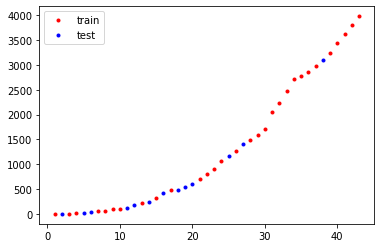

In [323]:
print(Xdata.shape) 
print(ydata.shape)

plt.plot(X_train, y_train, "r.", label="train")
plt.plot(X_test, y_test, "b.", label="test")
plt.legend(loc="best")

In [0]:
# from sklearn.linear_model import LinearRegression
# reg = LinearRegression() # contruyendo el objeto
# reg.fit(X_train, y_train) #ajustar solo sobre train
# #predicción
# y_test_e=reg.predict(X_test)
# y_train_e=reg.predict(X_train)

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import Pipeline
#reg = LinearRegression() # construyendo el objeto
gamma = 0.01
alpha = 0.001
reg = KernelRidge(kernel='rbf',gamma=gamma, alpha = alpha)
reg.fit(X_train,y_train) #ajustar solo sobre train
#prediccion
y_test_e = reg.predict(X_test)
y_train_e = reg.predict(X_train)

In [326]:
steps=[('reg', KernelRidge(kernel = 'rbf'))]
parameters = {'reg__alpha' : [0,1e-3,1e-2,0.1,1,10,100,1000],              
              'reg__gamma': [1e-4,1e-3,1e-2,0.1,1,10,100,1000],
              'reg__kernel': ['rbf','poly'],
              }

pipeline = Pipeline(steps = steps)

grid_search = GridSearchCV(pipeline, parameters, n_jobs=4,cv=5,
                           scoring='neg_mean_absolute_error',verbose=10)

grid_search.fit(X_train, y_train)
#mejor modelo entrenado
best_model = grid_search.best_estimator_

print("\nMejores parámetros:\n")
print(grid_search.best_params_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Batch computation too fast (0.0065s.) Setting batch_size=2.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Batch computation too fast (0.0345s.) Setting batch_size=4.
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Batch computation too fast (0.0579s.) Setting batch_size=8.
[Parallel(n_jobs=4)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Batch computation too fast (0.0926s.) Setting batch_size=16.
[Parallel(n_jobs=4)]: Done 136 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Batch computation too fast (0.0960s.) Setting batch_size=32.
[Parallel(n_jobs=4)]: Batch computation too fast (0.1677s.) Setting batch_size=64.
[Parallel(n_jobs=4)]: Done 312 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 461 tasks      | elapsed:    1.0s
[Pa


Mejores parámetros:

{'reg__alpha': 0.001, 'reg__gamma': 0.01, 'reg__kernel': 'rbf'}


[Parallel(n_jobs=4)]: Done 640 out of 640 | elapsed:    1.2s finished


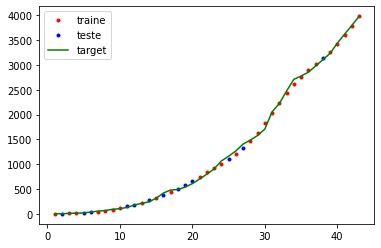

In [330]:
plt.plot(X_train, y_train_e, "r.", label="traine")
plt.plot(X_test, y_test_e, "b.", label="teste")
plt.plot(Xdata, ydata, label="target", color="g")
plt.legend(loc="best")

In [328]:
print(y_test_e)

[[ 1.75527279e+02]
 [ 1.46230999e+02]
 [ 1.41324476e+03]
 [ 3.48912722e+01]
 [ 2.48423354e+02]
 [-1.19568047e+00]
 [ 6.20141754e+02]
 [ 4.66973669e+02]
 [ 3.18679215e+03]
 [ 3.44186537e+02]
 [ 5.39591734e+02]
 [ 4.83988822e+01]
 [ 1.14668738e+03]]
